# Preparing stuff

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from collections import OrderedDict
import ast
import Bio.PDB
from Bio import SeqIO
from IPython.display import display
%matplotlib inline
%run 'functions_dump.py'
notebook_prefix = 'ks01'
image_counter = Counter()

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Orienting myself

In [2]:
karen_folder = os.getcwd()
analysis_folder = os.path.dirname(os.getcwd())
root_folder = os.path.dirname(analysis_folder)
data_folder = os.path.join(root_folder, 'Data')
figures_folder = os.path.join(karen_folder, 'figures')
small_tables_folder = os.path.join(root_folder, 'Data_Small_Tables')
files_dump_folder = os.path.join(karen_folder, 'files_dump')
structure_predictions_folder = os.path.join(files_dump_folder, 'structure_predictions')

### Reading the data

In [3]:
data_all = OrderedDict()
files = [f for f in os.listdir(data_folder) if '.csv' in f]
for f in sorted(files, key = lambda s: int(s.split('_')[0][1:])):
    data_all[f[:-9]] = pd.read_table(os.path.join(data_folder, f))

### Working with positions

In [4]:
def remove_gaps(seq):
    return ''.join([c for c in seq if c != '-'])

def get_wt_position(position_in_alignment):
    truncated_seq = remove_gaps(aligned_Scer[:position_in_alignment+1])
    return len(truncated_seq)

In [5]:
Scer_Uniprot = open(os.path.join(files_dump_folder, 'HIS3_saccharomyces_cerevisiae_from_Uniprot_P06633.txt')).read().rstrip()
alignment_file = os.path.join(small_tables_folder, 'aa_seq.txt')
for seq_record in SeqIO.parse(alignment_file, 'fasta'):
    if seq_record.id == 'Scer':
        aligned_Scer = str(seq_record.seq)
        break
assert remove_gaps(aligned_Scer) == Scer_Uniprot

In [6]:
positions = pd.read_table(os.path.join(small_tables_folder, 'positions.csv'))
positions = positions.set_index('Unnamed: 0').transpose().reset_index()
positions.rename(columns={'index' : 'segment', 'positions':'positions_alignment'}, inplace=True)
positions.reset_index(drop=True, inplace=True)
positions['positions_alignment'] = positions['positions_alignment'].apply(lambda s: ast.literal_eval(s))
positions['positions_Uniprot_P06633'] = positions.positions_alignment.apply(lambda l: [get_wt_position(p) for p in l])
segment_names = positions.segment.values # not explicitly sorted
positions.to_csv(os.path.join(files_dump_folder, 'information_about_segments.csv'), index=False)
positions

Unnamed: 0,segment,wt1,positions_alignment,len1,len2,start1,end1,wt2,start2,end2,positions_Uniprot_P06633
0,S1,EALGAVRGVK,"[140, 141, 142, 143, 144, 145, 146, 147, 148, ...",10,10,140,149,EALSRAVVDL,160,169,"[106, 107, 108, 109, 110, 111, 112, 113, 114, ..."
1,S2,SNRPYAVVE,"[170, 171, 172, 173, 174, 175, 176, 177, 178, ...",9,9,170,178,LSCEMIPHF,189,197,"[136, 137, 138, 139, 140, 141, 142, 143, 144, ..."
2,S3,LGLQREKVGD,"[179, 180, 181, 182, 183, 184, 185, 186, 187, ...",10,7,179,188,LESFAEA,198,204,"[145, 146, 147, 148, 149, 150, 151, 152, 153, ..."
3,S4,SRITLHVDCL,"[205, 206, 207, 208, 209, 210, 211, 212, 213, ...",10,10,205,214,SAFKALAVAI,225,234,"[171, 172, 173, 174, 175, 176, 177, 178, 179, ..."
4,S5,RGKNDHHRSE,"[215, 216, 217, 218, 219, 220, 221, 222, 223, ...",10,11,215,224,REATSPNGTND,235,251,"[181, 182, 183, 184, 185, 186, 187, 188, 189, ..."
5,S6,CGIALGQAFK,"[130, 131, 132, 133, 134, 135, 136, 137, 138, ...",10,10,130,139,RFGSGFAPLD,150,159,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,..."
6,S7,IHALAKHSGW,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",10,10,100,109,HIDDHHTTED,120,129,"[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 86, 8..."
7,S8,HTGIGFLDHM,"[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 110, ...",10,10,90,99,SLIVECIGDL,110,119,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 76, 7..."
8,S9,PEKEAE,"[66, 67, 68, 73, 74, 75, 82, 83, 84, 85, 86, 8...",6,8,66,75,TQSQVINV,82,89,"[36, 37, 38, 39, 40, 41, 48, 49, 50, 51, 52, 5..."
9,S10,IEHSIF,"[41, 42, 43, 44, 64, 65, 76, 77, 78, 79, 80, 81]",6,6,41,65,AVAEQA,76,81,"[30, 31, 32, 33, 34, 35, 42, 43, 44, 45, 46, 47]"


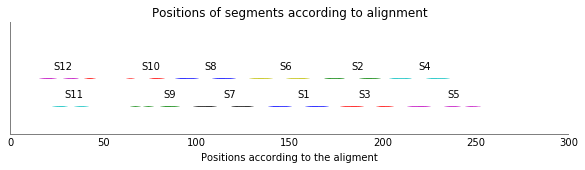

In [7]:
title = 'Positions of segments according to alignment'
plot_better(grid='', height=2)
old_y = 2
for row in positions.iterrows():
    for position in row[1].positions_alignment:
        new_y = np.random.choice([1,2])
        while new_y == old_y:
            new_y = np.random.choice([1,2])
    x = row[1].positions_alignment
    plt.plot(x, [new_y for e in x], '_', lw=3, alpha=0.7, label=row[1].segment)
    plt.text(np.median(x), new_y + 0.3, row[1].segment)
    old_y = new_y
plt.ylim(0,4)
plt.yticks([])
plt.xlabel('Positions according to the aligment')
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

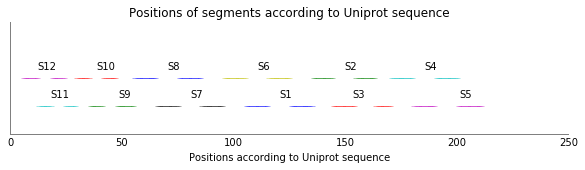

In [8]:
title = 'Positions of segments according to Uniprot sequence'
plot_better(grid='', height=2)
old_y = 2
for row in positions.iterrows():
    for position in row[1].positions_Uniprot_P06633:
        new_y = np.random.choice([1,2])
        while new_y == old_y:
            new_y = np.random.choice([1,2])
    x = row[1].positions_Uniprot_P06633
    plt.plot(x, [new_y for e in x], '_', lw=3, alpha=0.7, label=row[1].segment)
    plt.text(np.median(x), new_y + 0.3, row[1].segment)
    old_y = new_y
plt.ylim(0,4)
plt.yticks([])
plt.xlabel('Positions according to Uniprot sequence')
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

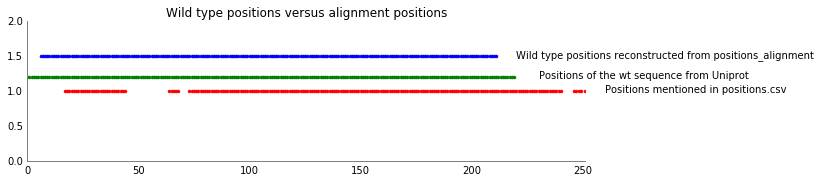

In [9]:
title = 'Wild type positions versus alignment positions'
ps = [item for sublist in positions.positions_alignment.values.flatten() for item in sublist]
wt_ps = [get_wt_position(p) for p in ps]

plot_better(height=2.5, grid='')

plt.plot(wt_ps, [1.5 for e in wt_ps], '.')
plt.text(220, 1.48, 'Wild type positions reconstructed from positions_alignment')

plt.plot(range(len(Scer_Uniprot)), [1.2 for e in range(len(Scer_Uniprot))], '.')
plt.text(230, 1.18, 'Positions of the wt sequence from Uniprot')

plt.plot(ps, [1 for e in ps], '.')
plt.text(260, 0.98, 'Positions mentioned in positions.csv')

plt.ylim(0,2)
plt.yticks()
plt.xlim(0, max([max(ps), len(Scer_Uniprot)]))
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

### Keeping only the mutants carrying substitutions (no indels, no mutations in the unmutated "central region")

In [10]:
data = OrderedDict()
for k,v in data_all.items():
    data[k] = v[(v.middle == 1) & (v.nogap == 1)]

### Singles

In [11]:
data_singles = OrderedDict()
for segment_name, segment_data in data.items():
    data_singles[segment_name] = segment_data[segment_data.mut_list.str.count(':') == 0]